In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('cmc_train.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,:9]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('cmc_test.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,:9]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

[1 1 1 ... 3 3 3]
[[24  2  3 ...  2  3  0]
 [45  1  3 ...  3  4  0]
 [43  2  3 ...  3  4  0]
 ...
 [39  3  3 ...  1  4  0]
 [33  3  3 ...  2  2  0]
 [17  3  3 ...  2  4  0]]
train_features (1327, 9)
train_labels (1327,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[[33  4  4 ...  3  3  0]
 [32  2  4 ...  3  3  0]
 [45  1  1 ...  2  2  1]
 ...
 [37  4  4 ...  3  4  0]
 [27  2  2 ...  3  1  0]
 [28  4  4 ...  1  3  0]]
test_features (146, 9)
test_labels (146,)


In [5]:
import matplotlib.pyplot as plt
import time
def plotBestFit(data0,data1, data2,save_name):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]
    c = np.shape(data2)[0]

    
    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
    for cc in range(c):
        axis_x2.append(data2[cc,0])
        axis_y2.append(data2[cc,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2,s=50, c='blue')


    
    #plt.xlabel('x1'); plt.ylabel('x2');
    # ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
    # ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
    # ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
    # ax.scatter(axis_x1, axis_y1,axis_z1,  c='red', marker='s')
    # ax.scatter(axis_x2, axis_y2, axis_z2, c='blue')
    plt.legend(fontsize='small',labels=[ '1','2','3'])  
    plt.savefig(save_name)
    plt.show()

**********************GaussianNB**********************
Training time cost 0.0019969940185546875 s
Test time cost 0.001997232437133789 s
GaussianNB accuracy= 0.4315068493150685


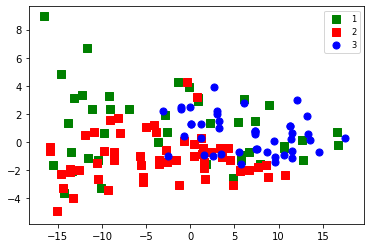

In [6]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import time
from sklearn import  decomposition
#高斯贝叶斯分类器
print('**********************GaussianNB**********************')
time_start = time.time()
# 创建分类器对象
clf = GaussianNB()
#用训练数据拟合分类器模型
clf = clf.fit(train_features.astype(np.float64), train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')

time_start = time.time()
#用训练好的分类器去预测test_features数据的标签类
label_predict = clf.predict(test_features.astype(np.float64))
time_end = time.time()
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
print('Test time cost',time_end-time_start,'s')
print('GaussianNB accuracy=', accuracy)

#提取主成分进行分析画图
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit( X_pca[label_predict == 1],X_pca[label_predict == 2],X_pca[label_predict == 3],
            "GaussianNB-matplotlib.png")

**********************MultinomialNB**********************
Training time cost 0.07180905342102051 s
Test time cost 0.0009968280792236328 s
MultinomialNB accuracy= 0.4931506849315068


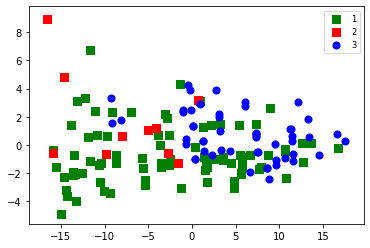

In [7]:
#多项式贝叶斯分类器
print('**********************MultinomialNB**********************')
time_start = time.time()
# 创建分类器对象
clf = MultinomialNB()
#用训练数据拟合分类器模型
clf = clf.fit(train_features.astype(np.float64), train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')

time_start = time.time()
#用训练好的分类器去预测test_features数据的标签类
label_predict = clf.predict(test_features.astype(np.float64))
time_end = time.time()
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
print('Test time cost',time_end-time_start,'s')
print('MultinomialNB accuracy=', accuracy)

#提取主成分进行分析画图
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit( X_pca[label_predict == 1],X_pca[label_predict == 2],X_pca[label_predict == 3],
            "MultinomialNB-matplotlib.png")